<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## .COLUMNS
I first start off with looking at the columns and manually deciding which features are fixed and which are not.

In [3]:
# A:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

As Id is not a deciding factor in sale price, I remove it so it does not affect the model.

In [4]:
house.drop(columns='Id',inplace=True)

In [5]:
#Identify estimators that cannot be renovated
fixedestimators=['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
       'HouseStyle','YearBuilt','YearRemodAdd','Foundation','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 'GarageType',
       'GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscFeature','MiscVal','MoSold', 'YrSold','SalePrice']
#Identify estimators that can be changed
changedestimators=['Utilities','OverallQual', 'OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'MasVnrType','MasVnrArea', 'ExterQual', 'ExterCond','BsmtQual',
       'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'HeatingQC','CentralAir', 'Electrical','LowQualFinSF','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence', 'SaleType','SaleCondition','YrSold','SalePrice' ]
target='SalePrice'

In [6]:
house.shape

(1460, 80)

## DATA CLEANING

In [7]:
#Removing Non-residential houses
house=house[(house['MSZoning']!= 'C (all)')]
print(house['MSZoning'].value_counts())

RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64


In [8]:
#Checking for all null values
nulls=house.isnull().sum()

In [9]:
#Checking for 0 values on LotFrontage
house[house['LotFrontage']==0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [10]:
#As there are no 0s in LotFrontage, np.nan could mean none
#And LotFrontage is numerical, 
#np.nan is taken to be 0
house['LotFrontage']=house['LotFrontage'].replace(np.nan,0)

In [11]:
#Alley,PoolQC,Fence,MiscFeature all have 1000> null values
#However, we cannot just remove the data features, as they may still be a good estimator for price
house['Alley']=house['Alley'].replace(np.nan,'None')
house['Fence']=house['Fence'].replace(np.nan,'None')
house['MiscFeature']=house['MiscFeature'].replace(np.nan,'None')
house['PoolQC']=house['PoolQC'].replace(np.nan,'None')

In [12]:
#BsmtQual           37
#BsmtCond           37
#BsmtExposure       38
#BsmtFinType1       37
#BsmtFinType2       38
#replace with None again.Nan values for all these values mean they do not have basements.
house[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]=house[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].replace(np.nan,'None')

In [13]:
#Null Values for MasVnrType might not actually mean None as there is already None.
#Removing NullValues
house=house[house['MasVnrType'].notnull()]

In [14]:
#Null Values for Electrical could mean there is no electricity in the house, can remove as there is only one row
house=house[house['Electrical'].notnull()]

In [15]:
#There are too many Null Values, which could mean too many houses without Fireplaces, we cannot afford to drop them
house['FireplaceQu']=house['FireplaceQu'].replace(np.nan, 'None')

In [16]:
#For Garage Info, since we do not have numerical values for the numerical columns, it will be easier to drop
#instead of replace
# house['GarageFinish']=house['GarageFinish'].replace(np.nan, 'None')
# house['GarageYrBlt']=house['GarageYrBlt'].replace(np.nan, np.mean(house['GarageYrBlt']))
# house['GarageCars']=house['GarageCars'].replace(np.nan, np.mean(house['GarageCars']))
# house['GarageCond']=house['GarageCond'].replace(np.nan, 'None')
# house['GarageQual']=house['GarageQual'].replace(np.nan, 'None')

house=house[house['GarageYrBlt'].notnull()]

In [17]:
house.isnull().sum().sum()
# no more null values

0

## EDA/FEATURE ENGINEERING

In [18]:
#EDA/Feature Engineering
fixedhouse=house[[x for x in house.columns if x in fixedestimators]]
fixedhouse.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,Foundation,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,PConc,150,856,856,854,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,2,548,0,61,0,0,0,0,None,0,2,2008,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,CBlock,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,2,460,298,0,0,0,0,0,None,0,5,2007,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,PConc,434,920,920,866,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,2,608,0,42,0,0,0,0,None,0,9,2008,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,BrkTil,540,756,961,756,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,3,642,0,35,272,0,0,0,None,0,2,2006,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,PConc,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,3,836,192,84,0,0,0,0,None,0,12,2008,250000


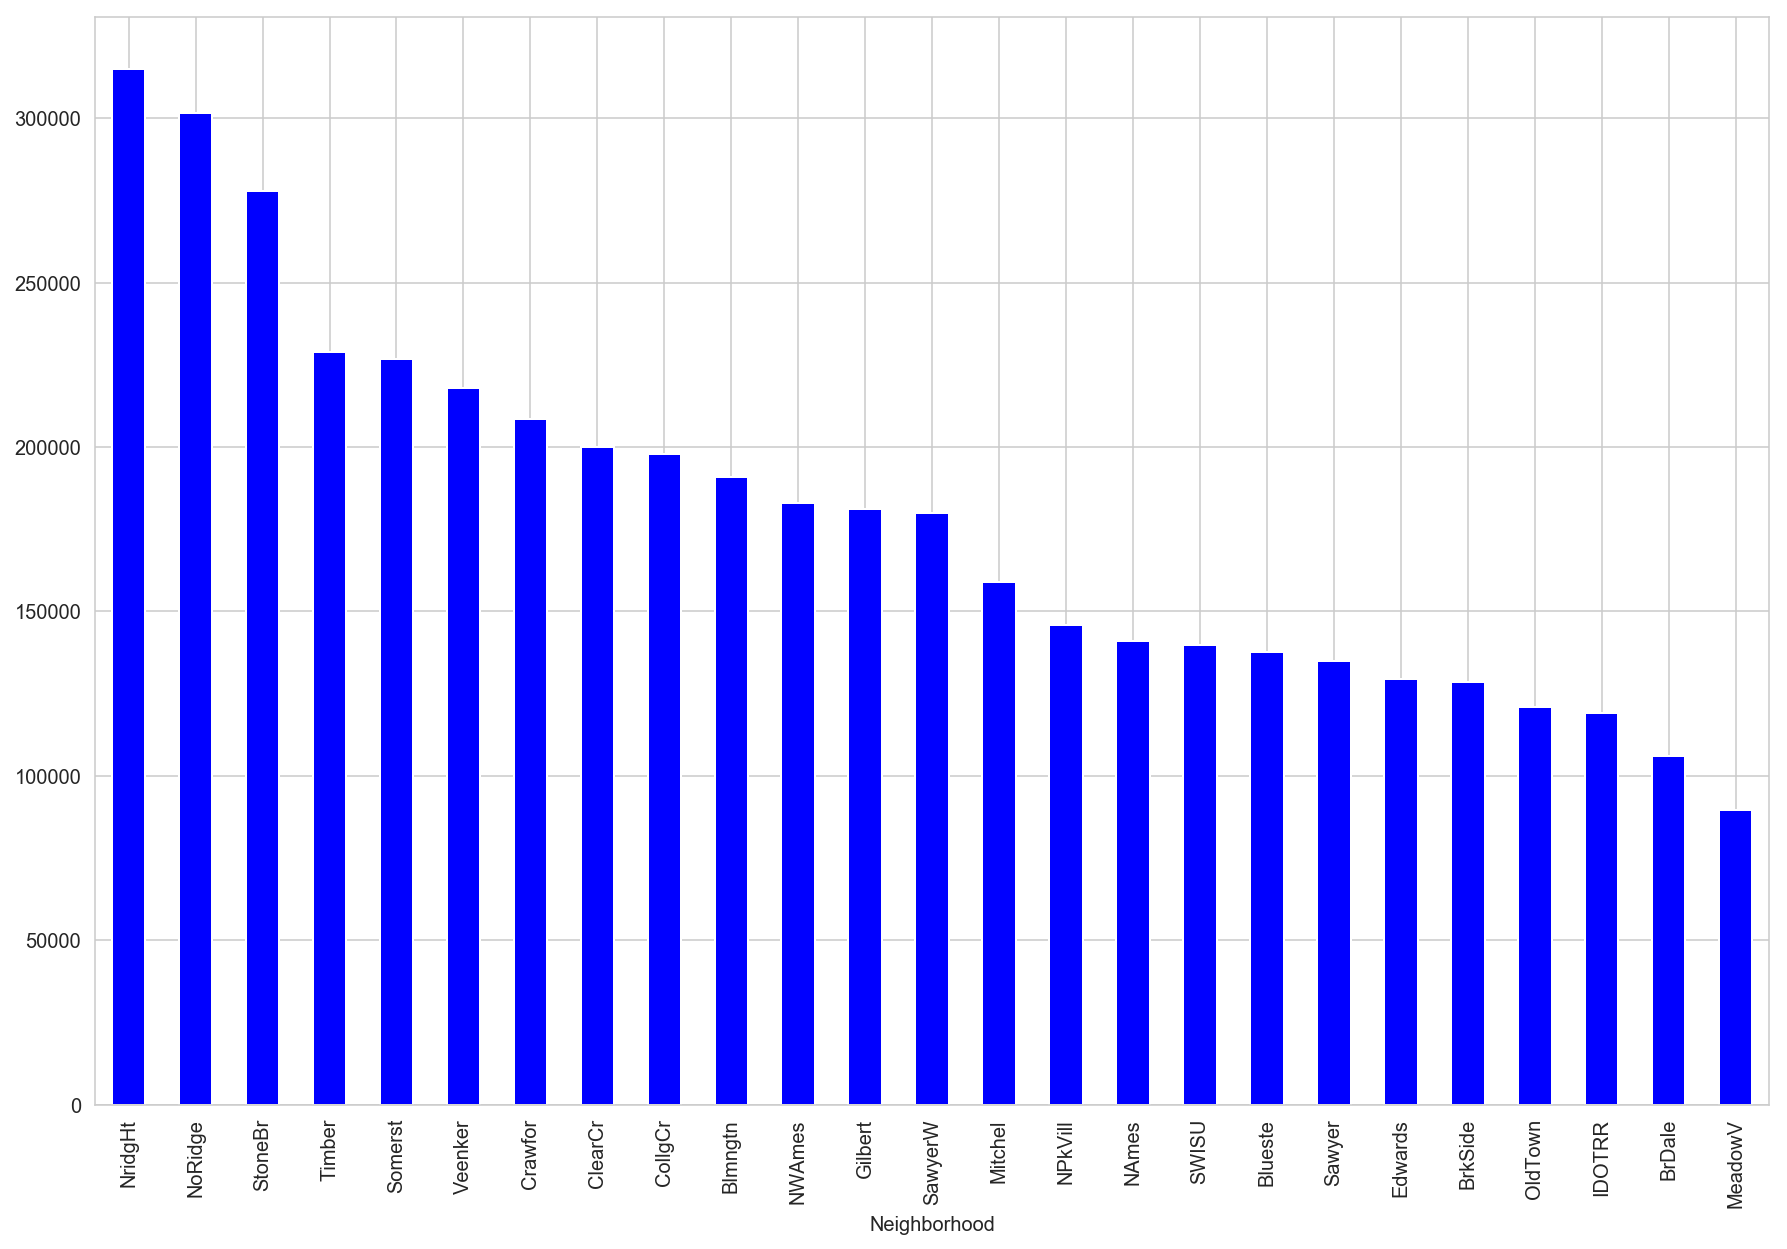

In [19]:
# Checking Neighborhoods by median Sale Price
fig,ax=plt.subplots(figsize=(15,10))
house.groupby('Neighborhood', as_index=True)['SalePrice'].median().sort_values(ascending=False).plot(kind='bar',color='b')

In [20]:
def mean_prices_categorical_var(df):
    for i in df:
        if df[i].dtype == 'O':
            print(house.groupby(i, as_index=True)['SalePrice'].mean() )  
            print("\n")
      
print(mean_prices_categorical_var(house))

MSZoning
FV    214888.129032
RH    127994.500000
RL    194451.347032
RM    131130.927461
Name: SalePrice, dtype: float64


Street
Grvl    175216.666667
Pave    185846.830022
Name: SalePrice, dtype: float64


Alley
Grvl    126402.418605
None    188178.363211
Pave    172870.777778
Name: SalePrice, dtype: float64


LotShape
IR1    210052.326882
IR2    239833.365854
IR3    216036.500000
Reg    169531.473995
Name: SalePrice, dtype: float64


LandContour
Bnk    149231.396226
HLS    239732.361702
Low    222693.548387
Lvl    184412.109667
Name: SalePrice, dtype: float64


Utilities
AllPub    185858.921381
NoSeWa    137500.000000
Name: SalePrice, dtype: float64


LotConfig
Corner     186073.229839
CulDSac    225154.456522
FR2        182521.022727
FR3        208475.000000
Inside     182100.919918
Name: SalePrice, dtype: float64


LandSlope
Gtl    184419.049536
Mod    210795.689655
Sev    216327.500000
Name: SalePrice, dtype: float64


Neighborhood
Blmngtn    194870.882353
Blueste    137500.00000

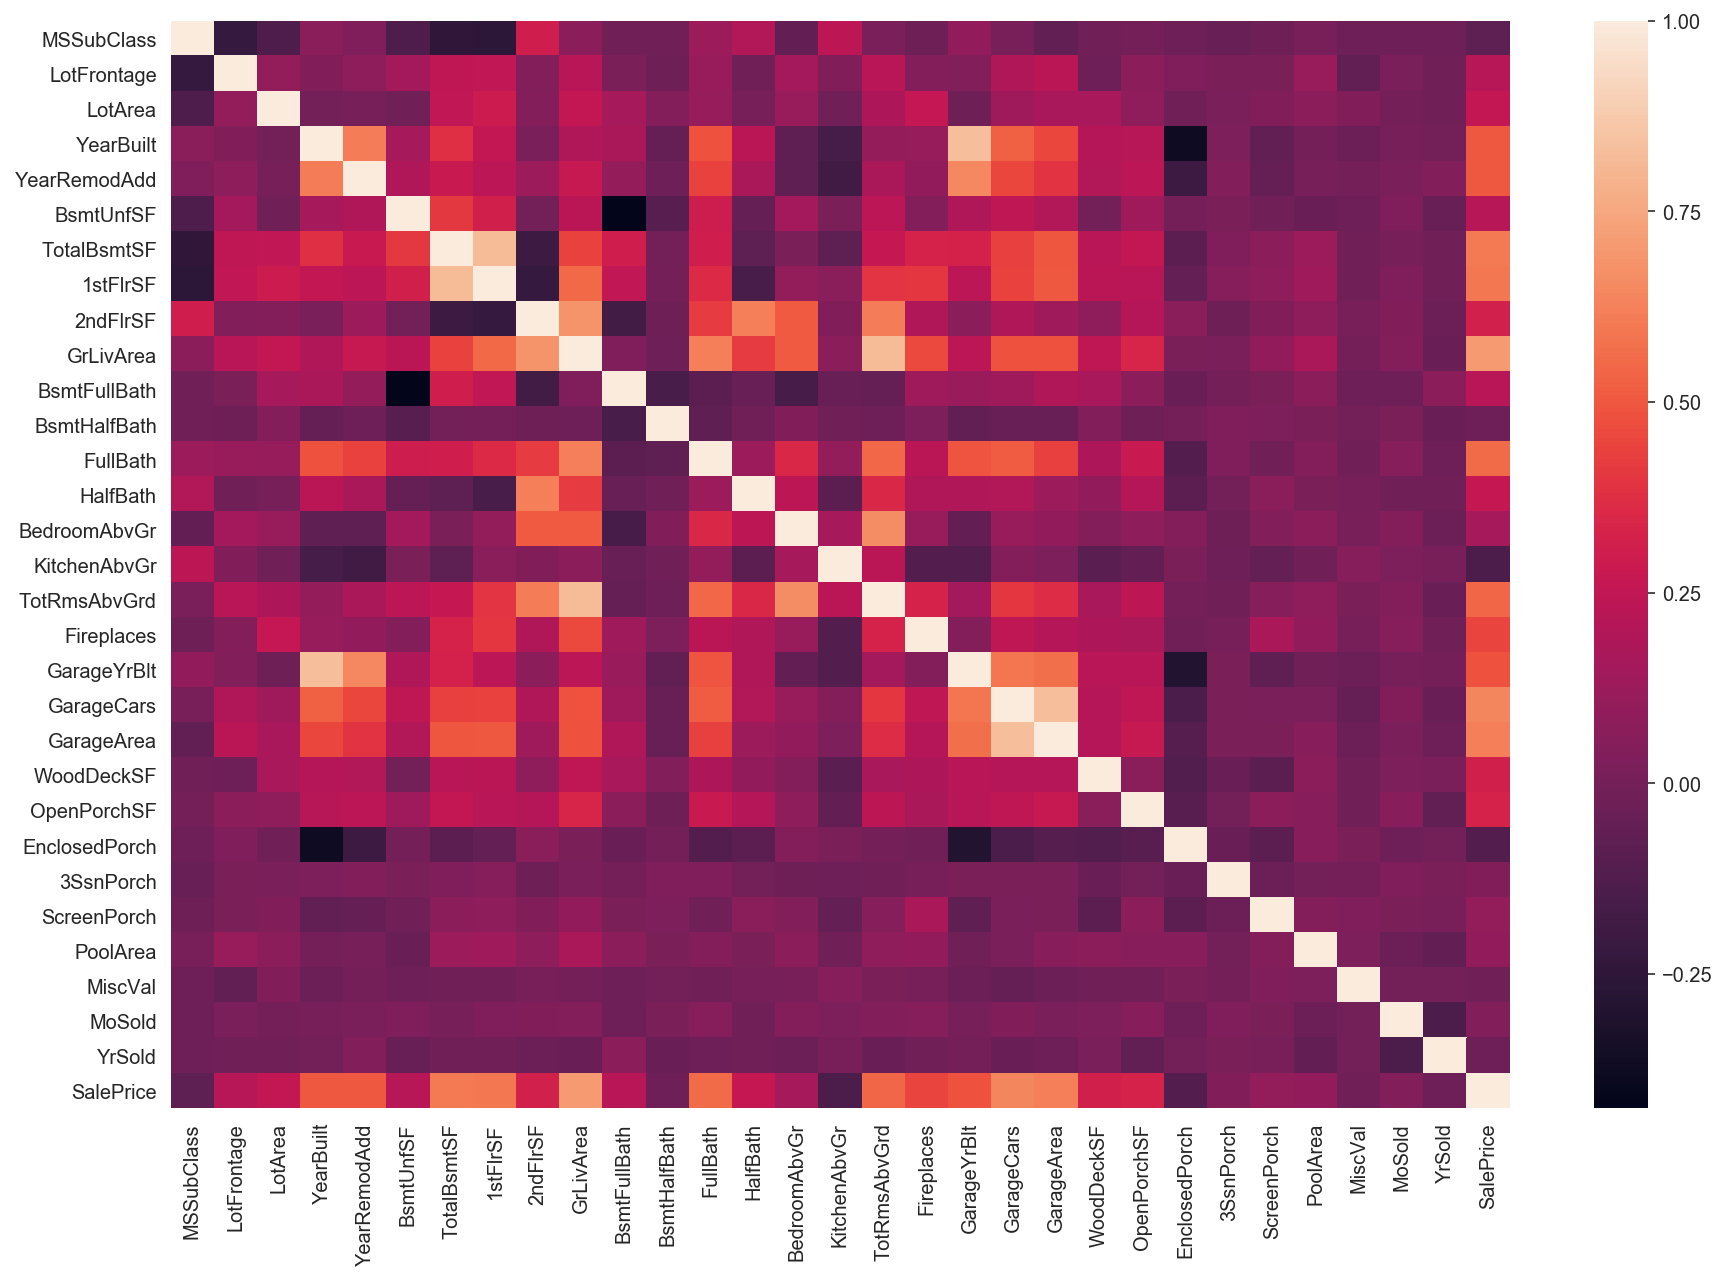

In [21]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(fixedhouse.corr())

In [22]:
fixedhouse.shape

(1362, 46)

In [23]:
fixedhouse.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,Foundation,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,PConc,150,856,856,854,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,2,548,0,61,0,0,0,0,None,0,2,2008,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,CBlock,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,2,460,298,0,0,0,0,0,None,0,5,2007,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,PConc,434,920,920,866,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,2,608,0,42,0,0,0,0,None,0,9,2008,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,BrkTil,540,756,961,756,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,3,642,0,35,272,0,0,0,None,0,2,2006,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,PConc,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,3,836,192,84,0,0,0,0,None,0,12,2008,250000


In [24]:
pd.get_dummies(fixedhouse, drop_first=True).head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,60,65.0,8450,2003,2003,150,856,856,854,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,20,80.0,9600,1976,1976,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
2,60,68.0,11250,2001,2002,434,920,920,866,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,70,60.0,9550,1915,1970,540,756,961,756,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,60,84.0,14260,2000,2000,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [25]:
fixedhousedummies=pd.get_dummies(fixedhouse,drop_first=True)

## MODELS

In [26]:
#How many models to run?
#1.Linear Regression(Standard/Penalised)
#2.Lasso/Ridge Regression
#5.Run with cross_val

In [27]:
#Split into Test/Train
X_train=fixedhousedummies[fixedhousedummies['YrSold']!=2010].drop(columns='SalePrice')
y_train=fixedhousedummies[fixedhousedummies['YrSold']!=2010]['SalePrice']

In [28]:
X_test=fixedhousedummies[fixedhousedummies['YrSold']==2010].drop(columns='SalePrice')
y_test=fixedhousedummies[fixedhousedummies['YrSold']==2010]['SalePrice']

Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [30]:
#Linreg model creation
linregmodel=LR.fit(X_train,y_train)
print(linregmodel.score(X_test,y_test))
y_pred=linregmodel.predict(X_test)

0.8446359016254543


In [31]:
linregre=np.reshape(linregmodel.coef_, newshape=(1,112))

In [32]:
#What are the strongest estimators for sale price?
#Linreg coefs
Linregcoef=pd.DataFrame(linregre, columns=X_test.columns, index=['Coefs']).T
Linregcoef.sort_values(by='Coefs', ascending=False).head()

,Coefs
Street_Pave,69417.905529
Neighborhood_StoneBr,61337.612800
Neighborhood_NridgHt,59715.377765
Condition2_PosA,53841.758554
Neighborhood_NoRidge,43672.243406


In [33]:
#Cross-Validated Score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(linregmodel, X_train, y_train,cv=10)
print(np.mean(scores))
print(np.std(scores))

0.7582004957235793
0.12470442832215775


Linear Regression(Standardized)

In [34]:
#What if we standardized the values?
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
St=ss.fit_transform(X_train)
Stest=ss.transform(X_test)
linregmodel2=LR.fit(St,y_train)
linregmodel2.score(Stest,y_test)

0.8446359016254564

In [35]:
linregre2=np.reshape(linregmodel2.coef_, newshape=(1,112))

In [36]:
#Linreg coefs
Linregcoef2=pd.DataFrame(np.abs(linregre2), columns=X_test.columns, index=['Coefs']).T
Linregcoef2.sort_values(by='Coefs', ascending=False).head()

,Coefs
GrLivArea,29537.758565
Neighborhood_NridgHt,13795.666911
2ndFlrSF,11110.622201
GarageType_Detchd,10706.344572
GarageType_Attchd,10579.203698


In [37]:
scores=cross_val_score(linregmodel2, St, y_train,cv=10)
print(np.mean(scores))
print(np.std(scores))

-1.692021843720856e+24
5.048677420546612e+24


Ridge Regression

In [38]:
# Implementing Ridge/Lasso Regression
from sklearn.linear_model import Ridge

## training the model
#getting optimal alpha

ridgereg = Ridge(alpha=0)

ridgereg.fit(St,y_train)
y_pred=ridgereg.predict(Stest)
alpha_range=np.logspace(-2,7,50)
from sklearn.linear_model import RidgeCV
ridgeregcv=RidgeCV(alphas=alpha_range, scoring='mean_squared_error')
ridgeregcv.fit(St,y_train)
print(ridgeregcv.score(Stest,y_test))
print(ridgeregcv.alpha_)

0.837614446689988
390.6939937054621


/Users/techno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/techno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/techno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/techno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weig

In [39]:
ridgeregoptimal=Ridge(alpha=390.694)
scores=cross_val_score(ridgeregoptimal, St,y_train,cv=10)
print(np.mean(scores))
print(np.std(scores))

0.7831394515250488
0.0947117794303179


In [40]:
Ridgeregre=np.reshape(ridgeregcv.coef_, newshape=(1,112))
Ridgeregcoef=pd.DataFrame(np.abs(Ridgeregre), columns=X_test.columns, index=['Coefs']).T
Ridgeregcoef.sort_values(by='Coefs', ascending=False).head()
#What are the strongest estimators for sale price?

,Coefs
GrLivArea,11133.997940
Neighborhood_NridgHt,9839.402234
1stFlrSF,8105.913434
TotalBsmtSF,7511.471636
Neighborhood_NoRidge,7454.297464


Lasso Regression

In [41]:
from sklearn.linear_model import LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(St, y_train)
print(optimal_lasso.score(Stest,y_test))
print(optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.8435998587577626
875.1578053845609


.......................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished


In [42]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lass=lasso.fit(St,y_train)
lasso_scores = cross_val_score(lasso, St, y_train, cv=10)

print(np.std(lasso_scores))
print(np.mean(lasso_scores))

0.11942398004288152
0.774211578980182


In [43]:
Lassoregre=np.reshape(optimal_lasso.coef_, newshape=(1,112))
Lassoregcoef=pd.DataFrame(np.abs(Lassoregre), columns=X_test.columns, index=['Coefs']).T
Lassoregcoef.sort_values(by='Coefs', ascending=False).head()
#What are the strongest estimators for sale price?

,Coefs
GrLivArea,30709.993802
Neighborhood_NridgHt,14131.405558
GarageCars,9923.288437
YearBuilt,9506.568843
Neighborhood_NoRidge,8902.531098


Linear regression model score:0.8446359016254543

Linear regression cross_val mean score:0.7582004957235793

Linear regression cross_val standard deviation: 0.12470442832215775



Ridge regression model score: 0.837614446689988

Ridge regression cross_val mean score: 0.7831394515250488

Ridge regression cross_val standard deviation: 0.0947117794303179



Lasso regression model score:0.8435998587577626

Lasso regression cross_val mean score:0.774211578980182

Lasso regression cross_val standard deviation:0.11942398004288152

It seems Linear Regression has the best model score followed very closely by Lasso, 
but as Lasso has a higher cross_val score with lower std, i will be using lasso regression as my main model.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

## MODELS

In [44]:
changedhouse=house[[x for x in house.columns if x in changedestimators]]
changedhouse.head()

,Utilities,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,YrSold,SaleType,SaleCondition,SalePrice
0,AllPub,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Gd,TA,No,GLQ,706,Unf,0,GasA,Ex,Y,SBrkr,0,Gd,Typ,None,RFn,TA,TA,Y,None,None,2008,WD,Normal,208500
1,AllPub,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Gd,TA,Gd,ALQ,978,Unf,0,GasA,Ex,Y,SBrkr,0,TA,Typ,TA,RFn,TA,TA,Y,None,None,2007,WD,Normal,181500
2,AllPub,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Gd,TA,Mn,GLQ,486,Unf,0,GasA,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,Y,None,None,2008,WD,Normal,223500
3,AllPub,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,TA,Gd,No,ALQ,216,Unf,0,GasA,Gd,Y,SBrkr,0,Gd,Typ,Gd,Unf,TA,TA,Y,None,None,2006,WD,Abnorml,140000
4,AllPub,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Gd,TA,Av,GLQ,655,Unf,0,GasA,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,Y,None,None,2008,WD,Normal,250000


In [45]:
changedhousedummies=pd.get_dummies(changedhouse, drop_first=True)

In [46]:
X_changed_train=changedhousedummies[changedhousedummies['YrSold']!=2010].drop(columns='SalePrice')

In [47]:
X_changed_test=changedhousedummies[changedhousedummies['YrSold']==2010].drop(columns='SalePrice')

##### Lasso Regression Model from question 1

In [48]:
ypred_test=y_test-lass.predict(Stest)
ypred_train=y_train-lass.predict(St)

ypred will be the new target for model 2 so as to determine if changable features actually affect the house value.

Linear Regression

In [49]:
changedlinregmodel=LR.fit(X_changed_train,ypred_train)
print(changedlinregmodel.score(X_changed_test,ypred_test))

0.3548109079779208


In [50]:
scores=cross_val_score(changedlinregmodel, X_changed_train, ypred_train,cv=10)
print(np.mean(scores))
print(np.std(scores))
# Wow, very bad

-0.9189966616713937
1.9636220735010574


In [51]:
linregre3=np.reshape(changedlinregmodel.coef_, newshape=(1,141))
Linregcoef3=pd.DataFrame(np.abs(linregre3), columns=X_changed_test.columns, index=['Coefs']).T
Linregcoef3.sort_values(by='Coefs', ascending=False).head()
# What are the best esitimators for price variance?

,Coefs
RoofMatl_WdShngl,597037.407294
RoofMatl_Membran,581050.124377
RoofMatl_Metal,554554.612642
RoofMatl_Roll,546050.816919
RoofMatl_Tar&Grv,535956.673305


Linear Regression(Standardized)

In [52]:
Sg=ss.fit_transform(X_changed_train)
Sx=ss.transform(X_changed_test)

In [53]:
Standlinregmodel=LR.fit(Sg,ypred_train)
print(Standlinregmodel.score(Sx,ypred_test))

0.3548723141692206


In [54]:
scores=cross_val_score(Standlinregmodel, Sg, ypred_train,cv=10)
print(np.mean(scores))
print(np.std(scores))
# Still Very bad

-4.515646118364418e+24
1.1096543749159968e+25


In [55]:
linregre3=np.reshape(Standlinregmodel.coef_, newshape=(1,141))
Linregcoef3=pd.DataFrame(np.abs(linregre3), columns=X_changed_test.columns, index=['Coefs']).T
Linregcoef3.sort_values(by='Coefs', ascending=False).head()

,Coefs
BsmtCond_None,2.987582e+16
BsmtFinType1_None,2.621715e+16
Exterior1st_CBlock,1.601723e+16
Exterior2nd_CBlock,1.601723e+16
BsmtCond_Po,1.245769e+16


Ridge Regression

In [56]:
ridgereg = Ridge(alpha=0)

ridgereg.fit(Sg,ypred_train)
alpha_range=np.logspace(-2,7,50)
from sklearn.linear_model import RidgeCV
ridgeregcv=RidgeCV(alphas=alpha_range, scoring='mean_squared_error')
ridgeregcv.fit(Sg,ypred_train)
print(ridgeregcv.score(Sx,ypred_test))
print(ridgeregcv.alpha_)

0.16877866631737037
2120.9508879201926


/Users/techno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/techno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/techno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/techno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weig

In [57]:
ridgeregoptimal=Ridge(alpha=390.694)
scores=cross_val_score(ridgeregoptimal, Sg,ypred_train,cv=10)
print(np.mean(scores))
print(np.std(scores))

0.10296313163129736
0.18324546533602273


In [58]:
ridgeregoptimal.fit(Sg,ypred_train)
linregre3=np.reshape(ridgeregoptimal.coef_, newshape=(1,141))
Linregcoef3=pd.DataFrame(np.abs(linregre3), columns=X_changed_test.columns, index=['Coefs']).T
Linregcoef3.sort_values(by='Coefs', ascending=False).head()
# What are the best estimators for price variance

,Coefs
RoofMatl_WdShngl,5049.716391
PoolQC_Gd,4748.019969
OverallQual,4461.611202
OverallCond,4446.412380
BsmtQual_Gd,3865.980365


Lasso Regression

In [59]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Sg, ypred_train)
print(optimal_lasso.score(Sx,ypred_test))
print(optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.19805516367932108
1317.034758040133


....................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.3s finished


In [60]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lass=lasso.fit(Sg,ypred_train)
lasso_scores = cross_val_score(lasso, Sg, ypred_train, cv=10)

print(np.std(lasso_scores))
print(np.mean(lasso_scores))

0.20671657868478985
0.11317855429474011


In [61]:
linregre3=np.reshape(lass.coef_, newshape=(1,141))
Linregcoef3=pd.DataFrame(np.abs(linregre3), columns=X_changed_test.columns, index=['Coefs']).T
Linregcoef3.sort_values(by='Coefs', ascending=False).head()
#What are the best estimators for price variance

,Coefs
OverallQual,5927.682085
OverallCond,4105.883029
RoofMatl_WdShngl,4103.583907
BsmtQual_Gd,4056.356781
PoolQC_Gd,3981.846008


All the models seem to have very low scores, thus possibly suggesting that the models do not really affect the prices

These models are not good estimators for the price variance, thus they should not be used.

There are still some strong estimators for price variance, as explained by the top 5 estimators for each model, and that should be what the company focuses on if renovation is to be done.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

Lets First Start of with finding out the class imbalance of the data:


In [69]:
print('Length of Abnormal Sales:' , len(house[house['SaleCondition']=='Abnorml']))
print('Length of the rest: ' , len(house[house['SaleCondition']!='Abnorml']))

Length of Abnormal Sales: 84
Length of the rest:  1278


That is indeed imbalanced, to tackle class imbalances,
i am going to use confusion matrix and change the threshold for prediction

In [81]:
#removing continuous variables

In [123]:
ypd=pd.get_dummies(house)

In [124]:
y=ypd['SaleCondition_Abnorml'].values

In [88]:
dummy=pd.get_dummies(house, drop_first=True)

In [86]:
con=["MoSold","YrSold","SalePrice","MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

In [100]:
classhouse=dummy[[x for x in dummy.columns if x not in con]]
classhouse.head()

,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,1,0,

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [130]:
knn.fit(classhouse,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [137]:
y_pp=knn.predict_proba(classhouse)

In [136]:
predicted=knn.predict(classhouse)
tp = np.sum((y == 1) & (predicted == 1))
fp = np.sum((y == 0) & (predicted == 1))
tn = np.sum((y == 0) & (predicted == 0))
fn = np.sum((y == 1) & (predicted == 0))
print (tp, fp, tn, fn)

8 0 1278 76


76 predicted falsely for abnormal sales, we will try to change the threshold for predictions to ensure there are more true positives

In [142]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(y, predicted, labels=[1,0]))

confusion = pd.DataFrame(conmat,
                         )
confusion

,0,1
0,8,76
1,0,1278


In [143]:
Y_pp = pd.DataFrame(knn.predict_proba(classhouse), columns=['class_0_pp','class_1_pp'])
Y_pp.head()

,class_0_pp,class_1_pp
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.8,0.2
4,0.8,0.2


In [147]:
Y_pp['pred_class_thresh10'] = [1 if x >= 0.10 else 0 for x in Y_pp.class_1_pp.values]
Y_pp.head()

,class_0_pp,class_1_pp,pred_class_thresh10
0,1.0,0.0,0
1,1.0,0.0,0
2,1.0,0.0,0
3,0.8,0.2,1
4,0.8,0.2,1


In [146]:
conmat = np.array(confusion_matrix(y, Y_pp.pred_class_thresh10.values, labels=[1,0]))

confusion = pd.DataFrame(conmat)
confusion

,0,1
0,84,0
1,177,1101


In [149]:
newy=Y_pp.pred_class_thresh10

In [150]:
knn.fit(classhouse,newy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')